<a href="https://colab.research.google.com/github/Dewwbe/Deep-Learning-labs/blob/main/Task_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV (make sure you've uploaded Au_nanoParticle_dataset.csv in Colab)
df = pd.read_csv("/content/sample_data/Au_nanoparticle_dataset.csv")

# View first few rows to confirm
df.head()


,ID,T,tau,time,N_total,N_bulk,N_surface,Volume,R_min,R_max,...,q6q6_S14,q6q6_S15,q6q6_S16,q6q6_S17,q6q6_S18,q6q6_S19,q6q6_S20,q6q6_S20+,Total_E,Formation_E
0,1,273,0.000025,1,1599,1014,585,2.710000e-26,15.5898,19.4516,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5908.6345,343.4555
1,2,273,0.000025,2,1642,1034,608,2.780000e-26,15.3996,24.1755,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-6035.4034,384.8166
2,3,273,0.000025,3,4637,3365,1272,7.850000e-26,21.9199,31.0305,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-17330.1660,800.5040
3,4,273,0.000025,4,7189,5292,1897,1.220000e-25,23.2542,37.8795,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-26937.2010,1171.7890
4,5,273,0.000025,5,11004,8508,2496,1.860000e-25,27.1200,39.7614,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-41427.9010,1597.7390


In [8]:
# Keep only the required columns
new_df = df[['N_total', 'N_bulk', 'N_surface', 'R_avg']]


In [9]:
new_df.head(20)


,N_total,N_bulk,N_surface,R_avg
0,1599,1014,585,17.3706
1,1642,1034,608,17.6061
2,4637,3365,1272,25.3692
3,7189,5292,1897,29.7011
4,11004,8508,2496,34.2831
5,13375,10768,2607,36.6334
6,13795,11155,2640,37.0108
7,13947,11304,2643,37.1672
8,14020,11357,2663,37.2103
9,14056,11389,2667,37.2467


In [10]:
# Mean
mean_values = new_df.mean()

# Standard Deviation
std_values = new_df.std()

# Quartiles
quartiles = new_df.quantile([0.25, 0.5, 0.75])

print("Mean values:\n", mean_values)
print("\nStandard Deviation:\n", std_values)
print("\nQuartile values:\n", quartiles)


Mean values:
 N_total      3085.915371
N_bulk       2185.627519
N_surface     900.287853
R_avg          19.762452
dtype: float64

Standard Deviation:
 N_total      3418.276033
N_bulk       2737.528403
N_surface     704.650440
R_avg           7.179896
dtype: float64

Quartile values:
       N_total  N_bulk  N_surface    R_avg
0.25    989.0   575.0      422.0  14.7024
0.50   1719.0  1081.0      632.0  18.0320
0.75   3593.0  2354.0     1153.0  23.5129


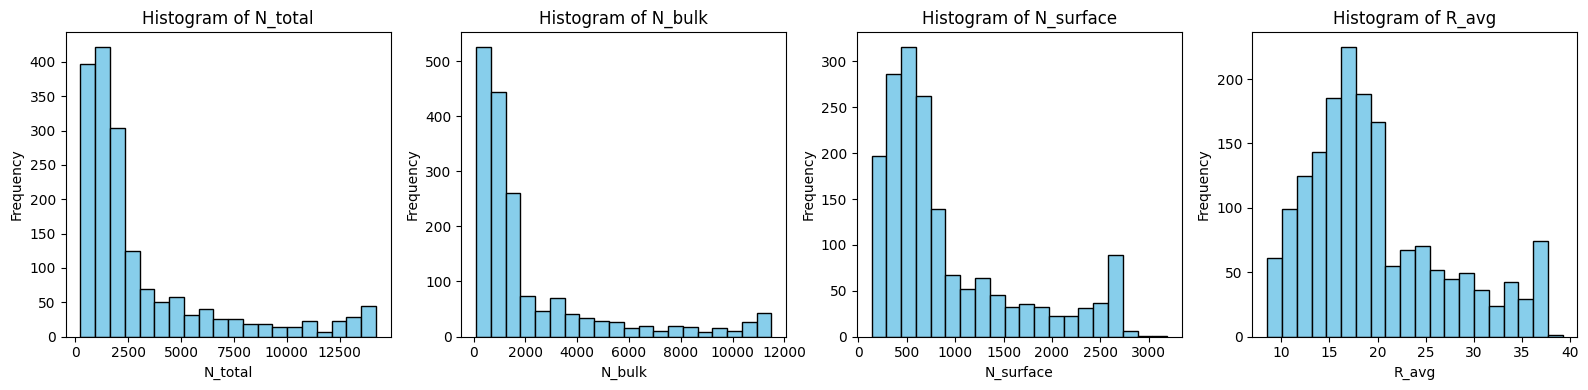

In [11]:
plt.figure(figsize=(16, 4))

for i, col in enumerate(new_df.columns, 1):
    plt.subplot(1, 4, i)
    plt.hist(new_df[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


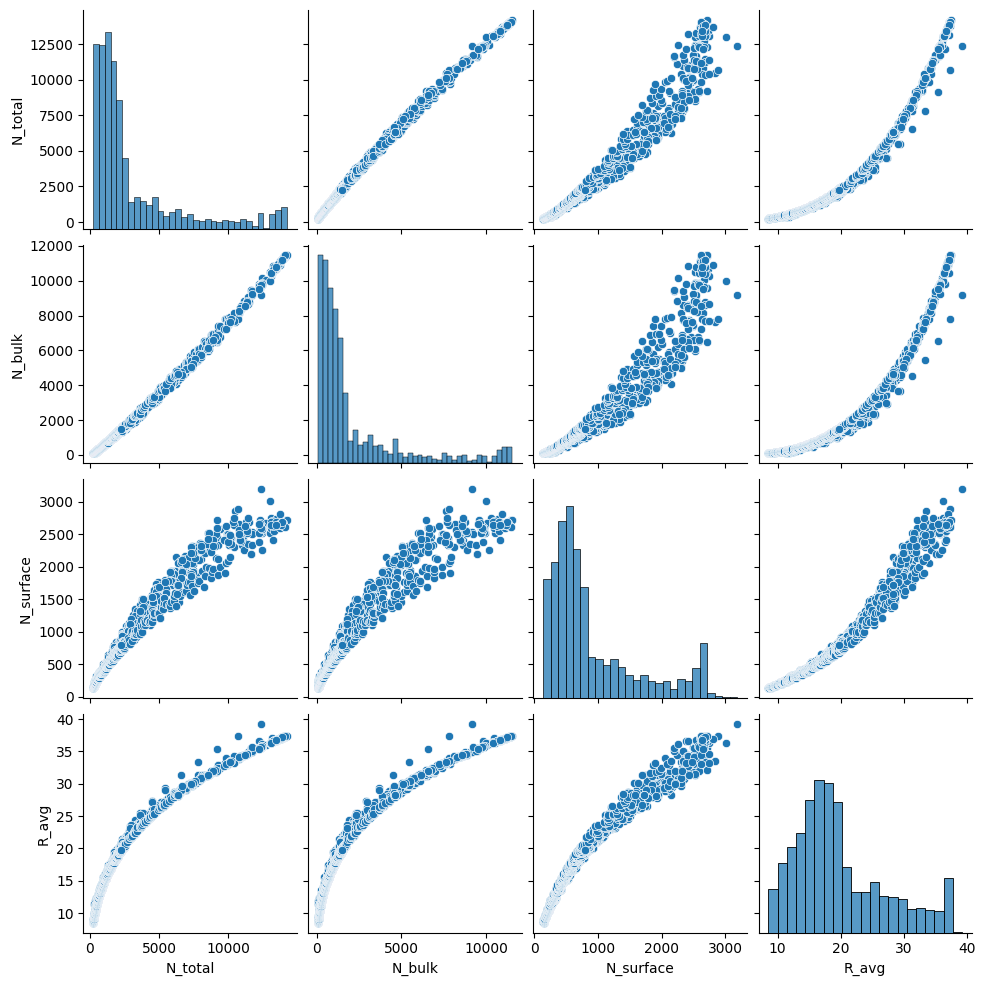

In [12]:
sns.pairplot(new_df, diag_kind='hist')
plt.show()


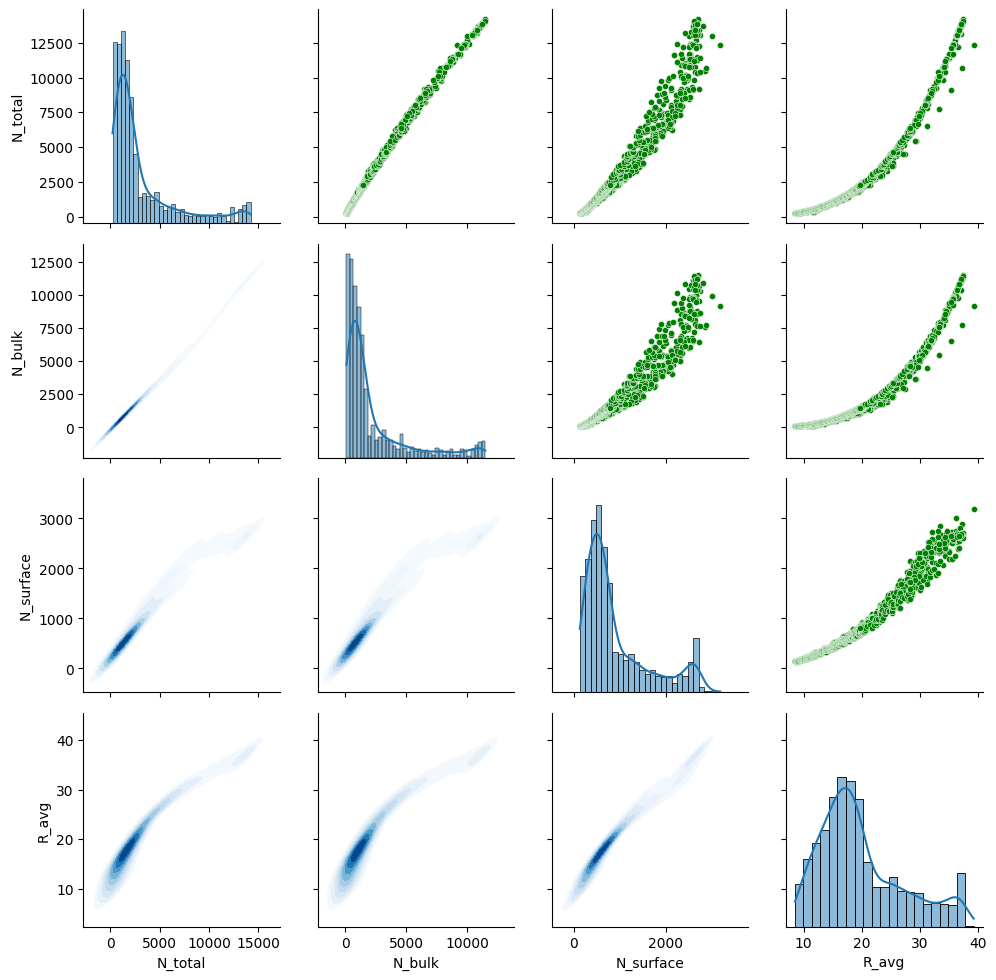

In [15]:
g = sns.PairGrid(new_df)

# Upper half – let's keep scatterplots
g.map_upper(sns.scatterplot, color='green', s=20)

# Diagonal – histogram + KDE overlay
def hist_kde(x, color, label, **kwargs):
    sns.histplot(x, kde=True, color=color, edgecolor='black', **kwargs)

g.map_diag(hist_kde)

# Lower half – bivariate KDE
g.map_lower(sns.kdeplot, fill=True, cmap='Blues')

plt.show()